In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

/home/local/ADMOGLILABS/kulvinder.singh/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Reading Files
df_2015 = pd.read_csv('./894_813759_bundle_archive/2015.csv')
df_2016 = pd.read_csv('./894_813759_bundle_archive/2016.csv')

df_2017 = pd.read_csv('./894_813759_bundle_archive/2017.csv')
df_2018 = pd.read_csv('./894_813759_bundle_archive/2018.csv')

In [144]:
#Lets take a look at columns
df_2015.columns,df_2015.shape

(Index(['Country', 'Happiness Rank', 'Happiness Score',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity'],
       dtype='object'),
 (158, 9))

In [8]:
df_2018.columns,df_2018.shape

(Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
        'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption'],
       dtype='object'),
 (156, 9))

## Data Cleaning

As we can see there is some inconsistency in columns between individual daaframes, we need to ensure that same features are used while concatenating them.

In [9]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [11]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


We will take columns in df_2015 as baseline, as we can see df_2016 is having few extra columns, so we will remove them.

In [13]:
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Region','Dystopia Residual'],axis=1,inplace=True)

In [14]:
df_2015.drop(['Standard Error','Region','Dystopia Residual'],axis=1,inplace=True)

Lets clean rest of dataframes.

In [15]:
df_2015.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [16]:
df_2017.head()  

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [17]:
updated_columns = [i.replace('.',' ') for i in df_2017.columns.tolist()]

df_2017.columns = updated_columns

In [18]:
df_2017.drop([ 'Whisker high','Whisker low','Dystopia Residual'],axis=1,inplace = True)

In [19]:
df_2017.rename(columns={'Economy  GDP per Capita ':'Economy (GDP per Capita)',
                   'Health  Life Expectancy ':'Health (Life Expectancy)',
                  'Trust  Government Corruption ':'Trust (Government Corruption)'},inplace=True)

In [35]:
df_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [21]:
df_2018.rename(columns={'Country or region':'Country',
                        'Score':'Happiness Score',
                   'Overall rank':'Happiness Rank',
                        'GDP per capita':'Economy (GDP per Capita)',
                        'Freedom to make life choices':'Freedom',
                   'Healthy life expectancy':'Health (Life Expectancy)',
                        'Social support':'Family',
                  'Perceptions of corruption':'Trust (Government Corruption)'},inplace=True)

In [22]:
df = pd.concat([df_2015,df_2016,df_2017,df_2018],axis=0).reset_index(drop=True)

## Exploratory Data Analysis

In [143]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,625.000000,626.000000
mean,78.747604,5.372021,0.918764,1.045891,0.584299,0.415706,0.129138,0.226981
std,45.219609,1.131774,0.409808,0.328946,0.241948,0.154943,0.108202,0.126854
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.497750,0.606755,0.847945,0.404142,0.310500,0.056565,0.137263
50%,79.000000,5.307000,0.983705,1.081274,0.632553,0.434635,0.094000,0.208581
75%,118.000000,6.187250,1.239502,1.283387,0.772957,0.538998,0.161570,0.290915
max,158.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.551910,0.838075


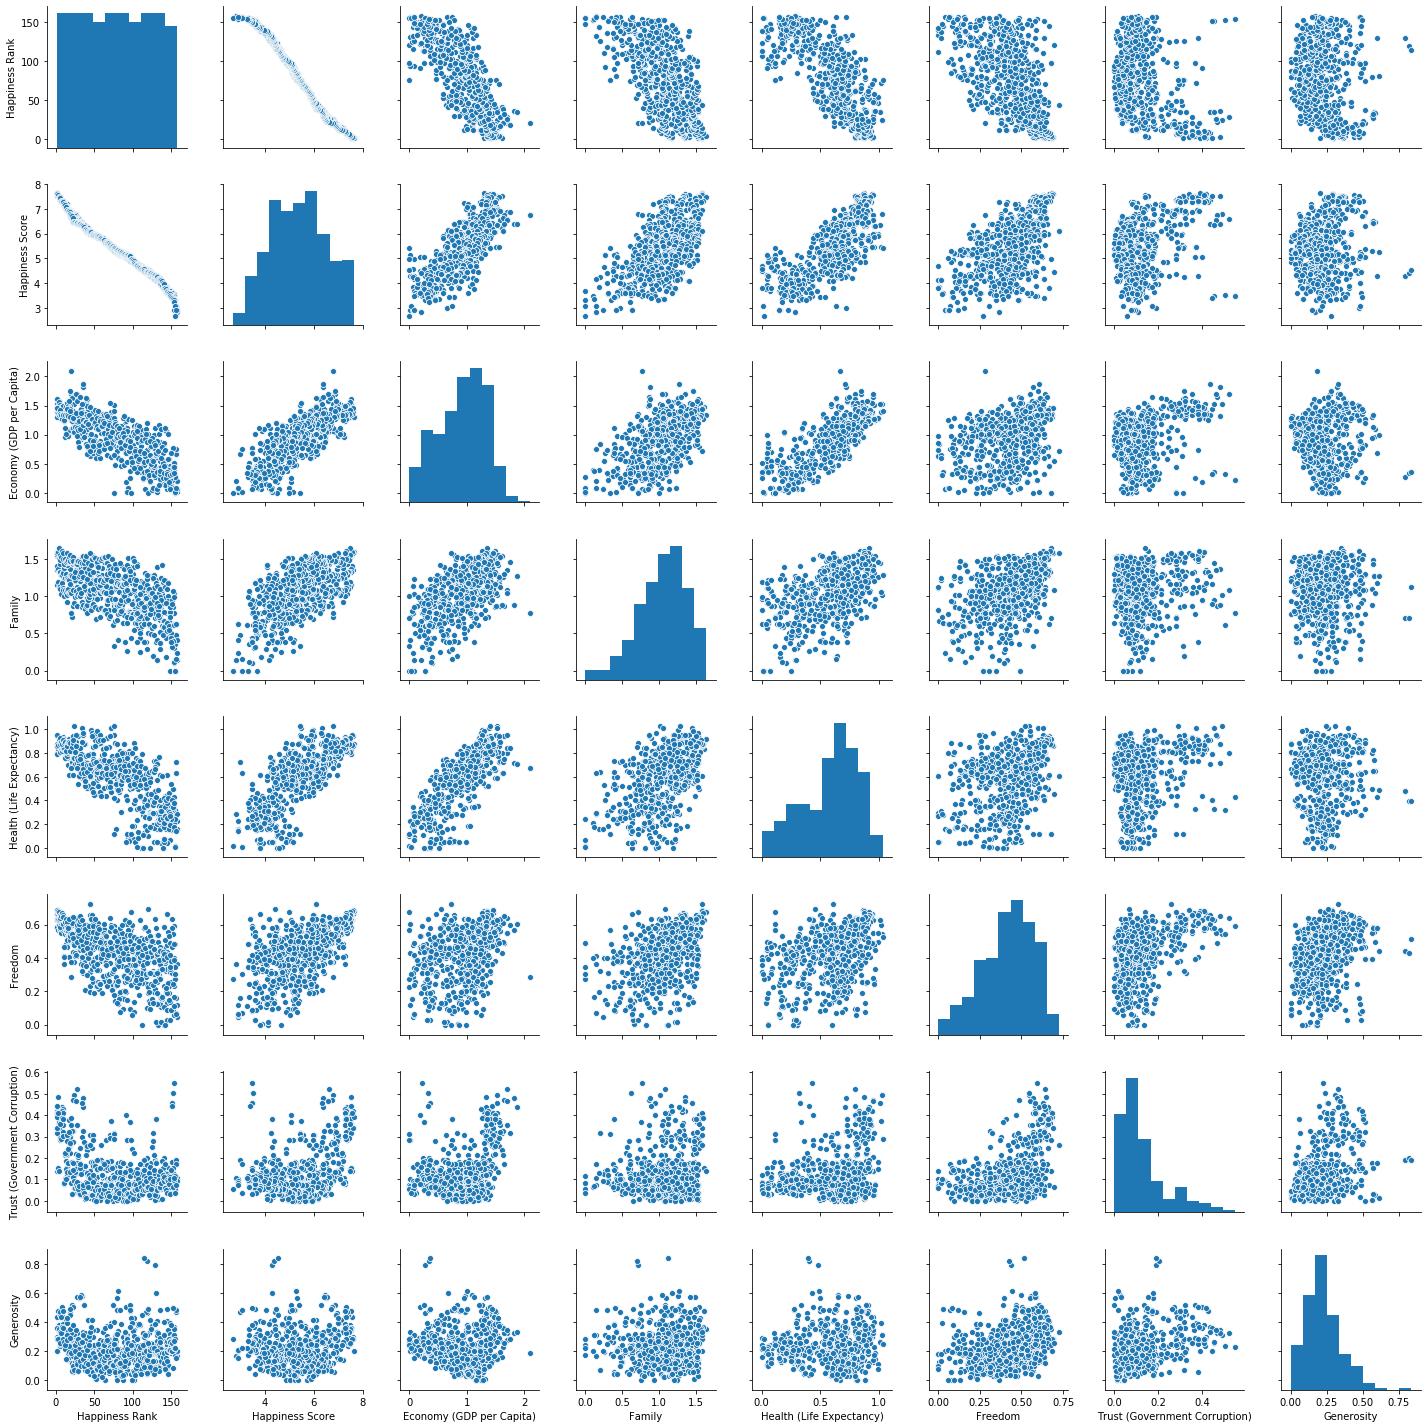

In [142]:
sns.pairplot(df);

# Questions we will answer:

* Does <u>Corruption  affects Happinesss?


* What <u>makes a Country more happy?
 * Economy (GDP) or Freedom


* What is <u> happiness score in case of poor countries (Low GDP) ?


* What <u>relates most to Happiness?


## Does Corruption affects Happinesss?

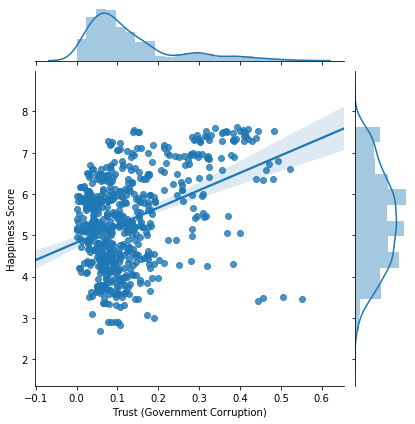

In [24]:
x = 'Trust (Government Corruption)'
y = 'Happiness Score'
sns.jointplot(data=df,x=x,y=y, kind='reg');

### No, Corruption and Happiness are not strongly correlated

## So, What makes a Country more happy ?

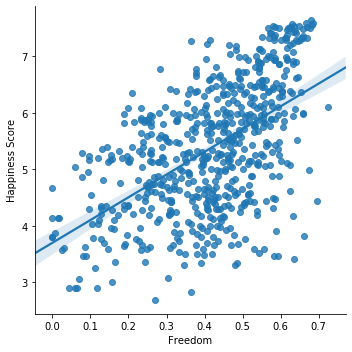

In [25]:
x = 'Freedom'
y = 'Happiness Score'
sns.lmplot(data=df,x=x,y=y);

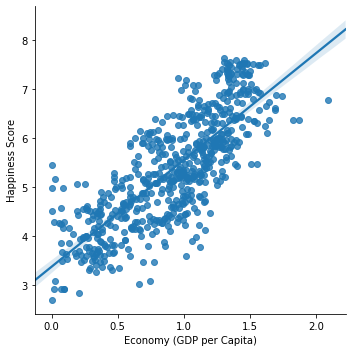

In [26]:
x = 'Economy (GDP per Capita)'
y = 'Happiness Score'
sns.lmplot(data=df,x=x,y=y);

### As visible in above graphs, it is clear that Economy of a country has stronger correlation with Happiness than Freedom.

**Notes:**
* Freedom still has some weak correlation with Happiness


## What is happiness score in case of poor countries (Low GDP) ?

We'll consider the countries having gdp score less than mean (~0.9) as poor.

In [51]:
df_poor = df[df['Economy (GDP per Capita)'] < df['Economy (GDP per Capita)'].mean()]

#filter rich countries
df_rich = df[~(df['Economy (GDP per Capita)'] < df['Economy (GDP per Capita)'].mean())]

In [58]:
df_poor['Happiness Score'].mean()

4.551802119851534

In [59]:
df_rich['Happiness Score'].mean()

6.04876093360634

### The mean happiness score for poor countries is significantly less than rich countries.
* Hence, it can be said that countries with less gdp often tend to have less happiness score.

## What relates most to Happiness?

In [128]:
X = df[['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity']]

y = df[['Happiness Score']]

In [129]:
X.isnull().sum()

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

We have missing value in one of our columns, we will impute it with mean.

In [130]:
X = X.fillna(X.mean())

In [131]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

We will split our data into train and test split, while using 33% of data as test set.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We will create a model and fit train data.

In [133]:
reg = linear_model.LinearRegression(normalize=True)

In [134]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [135]:
y_pred = reg.predict(X_test)

**r2 score** is a metric used to measure the accuracy of our predictions w.r.t the true value.

More close r2 score is to 1, more our predictions are closer to actual values.

[More on r2 metric here](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [136]:
r2_score(y_test, y_pred)

0.7289187955037795

In [137]:
cols = X.columns.tolist()

weight = reg.coef_.tolist()[0]

In [139]:
for i in range(len(X.columns)):
    print(cols[i],' : ' ,weight[i]) 

Economy (GDP per Capita)  :  1.0030019299874529
Family  :  0.7154479296823543
Health (Life Expectancy)  :  1.222139514991989
Freedom  :  1.4426167236646017
Trust (Government Corruption)  :  0.9890544070126698
Generosity  :  0.4447904262072287


### Freedom has the highest coefficient in our linear refression model, hence it relates most with Happiness score.